# **DIMNESIONALITY TEST**

This test is intended to demonstrate memory reduction during text pre-processing. For this purpose, 4 samples of the dataset with different number of headlines are used: 400, 4000, 25000 and 35000.

For each of the samples we intend to show the dimension before and after text pre-processing in:
- Number of unique words, i.e. all possible words in the corpus.
- Total number of words

In addition, it is intended to perform a memory usage check after applying regex in text preprocessing.

### IMPORT PACKAGES & FUNCTIONS

In [1]:
import re
import pandas as pd
import sklearn.svm as svm
import numpy as np
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from pickle import dump, load
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import nltk 
from nltk import download
from google.colab import files
download('wordnet')
download('omw-1.4')
download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
def preprocessing(text):
    text = text.lower()
    text_cleaned = re.sub(r'[^0-9a-z_+\-*]', ' ', text).strip()
    lemm = WordNetLemmatizer()
    title = []
    for token in text_cleaned.split():
        token_lemm = lemm.lemmatize(token)
        if token_lemm not in stopwords.words('english'):
             title.append(lemm.lemmatize(token))
    return ' '.join(str(elem) for elem in title)

In [3]:
def dim_reduction(df):
    dict_init = {}
    word_count = 0
    for headline in df:
        for word in headline.split():
            word_count = word_count + 1
            if word not in dict_init.keys():
                dict_init[word] = 1
            else:
                dict_init[word] = dict_init[word] + 1
    return len(dict_init.keys()), word_count

### DATA PREPARATION

In [4]:
uploaded = files.upload()
data_400 = pd.read_excel('/content/sample_400_Data&Headers.xlsx')
data_4000 = pd.read_excel('/content/sample_4000_Data&Headers.xlsx')
data_25000 = pd.read_excel('/content/sample_25000_Data&Headers.xlsx')
data_35000 = pd.read_excel('/content/sample_35000_Data&Headers.xlsx')

Saving sample_400_Data&Headers.xlsx to sample_400_Data&Headers.xlsx
Saving sample_4000_Data&Headers.xlsx to sample_4000_Data&Headers.xlsx
Saving sample_25000_Data&Headers.xlsx to sample_25000_Data&Headers.xlsx
Saving sample_35000_Data&Headers.xlsx to sample_35000_Data&Headers.xlsx


In [5]:
# Extracting headlines from sample
hd_400 = data_400['headline']
hd_4000 = data_4000['headline']
hd_25000 = data_25000['headline'] 
hd_35000 = data_35000['headline']

In [6]:
# Preprocessing headlines
hd_400_processed = hd_400.apply(lambda x: preprocessing(str(x)))
hd_4000_processed = hd_4000.apply(lambda x: preprocessing(str(x)))
hd_25000_processed = hd_25000.apply(lambda x: preprocessing(str(x)))
hd_35000_processed = hd_35000.apply(lambda x: preprocessing(str(x)))

### DIMENSIONALITY REDUCTION TEST

#### Comparing processed and unprocessed headlines

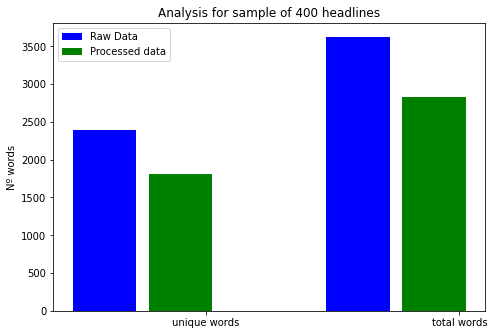

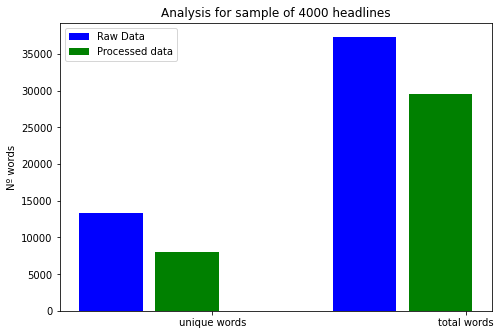

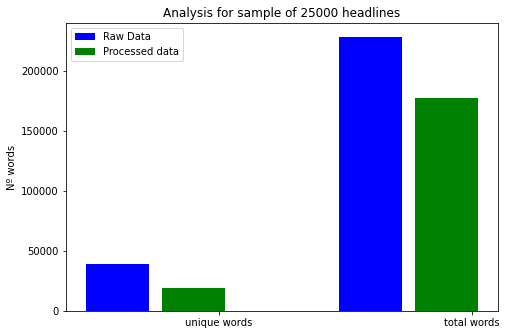

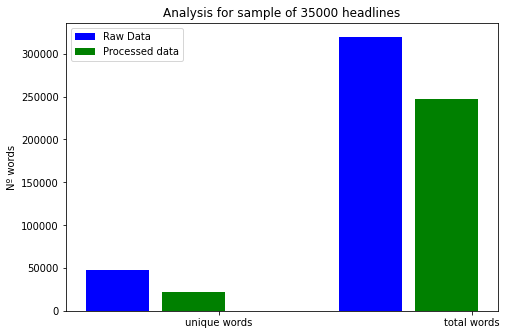

In [7]:
headline_list = [[400, hd_400, hd_400_processed], [4000, hd_4000, hd_4000_processed], [25000, hd_25000, hd_25000_processed], [35000, hd_35000, hd_35000_processed]]
for hd_info in headline_list:
  plt_num = hd_info[0]
  dif_word, total_word = dim_reduction(hd_info[1])
  dif_word_processed, total_word_processed = dim_reduction(hd_info[2])
  data = [[dif_word, total_word], [dif_word_processed, total_word_processed]]
  index = np.arange(2)
  bar_width = 0.5
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  plt.ylabel('Nº words')
  plt.title(f'Analysis for sample of {plt_num} headlines')
  plt.xticks(index + bar_width, ('unique words', 'total words'))
  ax.bar(index + 0.10, data[0], color = 'b', width = 0.25)
  ax.bar(index + 0.40, data[1], color = 'g', width = 0.25)
  ax.legend(labels=['Raw Data', 'Processed data'])
  plt.show()
  print()

## MEMORY USAGE

In [8]:
def preprocessing_regex(text):
    text = text.lower()
    text_cleaned = re.sub(r'[^0-9a-z_+\-*]', ' ', text).strip()
    return text_cleaned

In [13]:
hd_400_regex = hd_400.apply(lambda x: preprocessing_regex(x))
print("----- MEMORY USAGE FOR SAMPLE OF 400 HEADLINES -------")
print("Memory usage normal corpus: ", hd_400.memory_usage(deep=True))
print("Memory usage after regex: ", hd_400_regex.memory_usage(deep=True))
print("Memory usage after preprocessing: ", hd_400_processed.memory_usage(deep=True))

----- MEMORY USAGE FOR SAMPLE OF 400 HEADLINES -------
Memory usage normal corpus:  46323
Memory usage after regex:  45057
Memory usage after preprocessing:  41241


In [14]:
hd_4000_regex = hd_4000.apply(lambda x: preprocessing_regex(x))
print("----- MEMORY USAGE FOR SAMPLE OF 4000 HEADLINES -------")
print("Memory usage normal corpus: ", hd_4000.memory_usage(deep=True))
print("Memory usage after regex: ", hd_4000_regex.memory_usage(deep=True))
print("Memory usage after preprocessing: ", hd_4000_processed.memory_usage(deep=True))

----- MEMORY USAGE FOR SAMPLE OF 4000 HEADLINES -------
Memory usage normal corpus:  489041
Memory usage after regex:  463330
Memory usage after preprocessing:  423780


In [11]:
hd_25000_regex = hd_25000.apply(lambda x: preprocessing_regex(x))
print("----- MEMORY USAGE FOR SAMPLE OF 25000 HEADLINES -------")
print("Memory usage normal corpus: ", hd_25000.memory_usage(deep=True))
print("Memory usage after regex: ", hd_25000_regex.memory_usage(deep=True))
print("Memory usage after preprocessing: ", hd_25000_processed.memory_usage(deep=True))

----- MEMORY USAGE FOR SAMPLE OF 25000 HEADLINES -------
Memory usage normal corpus:  2903926
Memory usage after regex:  2820442
Memory usage after preprocessing:  2576870


In [12]:

hd_35000_regex = hd_35000.apply(lambda x: preprocessing_regex(x))
print("----- MEMORY USAGE FOR SAMPLE OF 35000 HEADLINES -------")
print("Memory usage normal corpus: ", hd_35000.memory_usage(deep=True))
print("Memory usage after regex: ", hd_35000_regex.memory_usage(deep=True))
print("Memory usage after preprocessing: ", hd_35000_processed.memory_usage(deep=True))

----- MEMORY USAGE FOR SAMPLE OF 35000 HEADLINES -------
Memory usage normal corpus:  4055277
Memory usage after regex:  3943296
Memory usage after preprocessing:  3601371
